In [23]:
import pandas as pd
from matplotlib import image
from matplotlib import pyplot

In [18]:
def check_missing(dataframe):
    if len(dataframe.columns[dataframe.isnull().any()]) == 0:
        print('There are no missing values.')
    else:
        print('Column Name', ' ', 'Number of Missing Values', ' ', 'Percentage of Total')
        for index, value in dataframe.isnull().sum().items():
            if value>0:
                print(index, ' '*(23-len(index)), value, ' '*(18-len(str(value))),'  ', 
                      round(value*100/len(dataframe), 2), "%")
                
def check_eda(dataframe):
    print('Preview of data: ')
    display(dataframe.head(3))
    print('\n', '-'*50, '\n')
    find_shape(dataframe)
    print('\n', '-'*50)
    print('\n Total number of rows, column types and null values:\n')
    print(dataframe.info())
    
def find_shape(dataframe):
    print('Rows:', dataframe.shape[0])
    print('Columns:', dataframe.shape[1])
    
def check_integrity(dataframe):
    print('Checking for duplicated rows...')
    print('\nNumber of duplicated rows: ', dataframe[dataframe.duplicated()].shape[0])
    if (dataframe[dataframe.duplicated()].shape[0]) > 0:
        print('\nDropping duplicates...')
        dataframe.drop_duplicates(inplace=True)
        print('\nDropped.')
    print('\nChecking min, max, mean and STD of numerical features to see if any values are illogical.')
    display(dataframe.describe(include='all').transpose())
    print('\nCounting the unique values of non numerical features (including missing values):\n')
    for col in dataframe.select_dtypes(include='object').columns:
        print('Count of: ', col)
        print(dataframe[col].value_counts(dropna=False), '\n')

In [13]:
df_hemorrhage = pd.read_csv('hemorrhage_diagnosis.csv')
df_patient = pd.read_csv('patient_demographics.csv')

In [15]:
check_eda(df_hemorrhage)

Preview of data: 


,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,49,1,0,0,0,0,0,1,0
1,49,2,0,0,0,0,0,1,0
2,49,3,0,0,0,0,0,1,0



 -------------------------------------------------- 

Rows: 2501
Columns: 9

 --------------------------------------------------

 Total number of rows, column types and null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PatientNumber     2501 non-null   int64
 1   SliceNumber       2501 non-null   int64
 2   Intraventricular  2501 non-null   int64
 3   Intraparenchymal  2501 non-null   int64
 4   Subarachnoid      2501 non-null   int64
 5   Epidural          2501 non-null   int64
 6   Subdural          2501 non-null   int64
 7   No_Hemorrhage     2501 non-null   int64
 8   Fracture_Yes_No   2501 non-null   int64
dtypes: int64(9)
memory usage: 176.0 KB
None


In [19]:
check_integrity(df_hemorrhage)

Checking for duplicated rows...

Number of duplicated rows:  0

Checking min, max, mean and STD of numerical features to see if any values are illogical.


,count,mean,std,min,25%,50%,75%,max
PatientNumber,2501.0,89.591363,23.762360,49.0,69.0,90.0,110.0,130.0
SliceNumber,2501.0,15.909636,9.071176,1.0,8.0,16.0,23.0,40.0
Intraventricular,2501.0,0.009596,0.097508,0.0,0.0,0.0,0.0,1.0
Intraparenchymal,2501.0,0.029188,0.168368,0.0,0.0,0.0,0.0,1.0
Subarachnoid,2501.0,0.007197,0.084547,0.0,0.0,0.0,0.0,1.0
Epidural,2501.0,0.069172,0.253798,0.0,0.0,0.0,0.0,1.0
Subdural,2501.0,0.022391,0.147981,0.0,0.0,0.0,0.0,1.0
No_Hemorrhage,2501.0,0.872851,0.333207,0.0,1.0,1.0,1.0,1.0
Fracture_Yes_No,2501.0,0.077969,0.268176,0.0,0.0,0.0,0.0,1.0



Counting the unique values of non numerical features (including missing values):



In [9]:
check_missing(df_hemorrhage)

There are no missing values.


In [20]:
check_eda(df_patient)

Preview of data: 


,Patient Number,Age\n(years),Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture (Yes/No),Condition on file,Note
0,49,35.000000,Male,NaN,1.0,NaN,1.0,NaN,1.0,Intracranial HGE+ Extradural HGE,NaN
1,50,0.583333,Female,NaN,1.0,NaN,NaN,NaN,1.0,Subdural HGE,NaN
2,51,5.000000,Male,NaN,1.0,NaN,NaN,1.0,1.0,Extadural HGE,NaN



 -------------------------------------------------- 

Rows: 82
Columns: 11

 --------------------------------------------------

 Total number of rows, column types and null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient Number     82 non-null     int64  
 1   Age
(years)        82 non-null     float64
 2   Gender             82 non-null     object 
 3   Intraventricular   5 non-null      float64
 4   Intraparenchymal   16 non-null     float64
 5   Subarachnoid       7 non-null      float64
 6   Epidural           21 non-null     float64
 7   Subdural           4 non-null      float64
 8   Fracture (Yes/No)  22 non-null     float64
 9   Condition on file  82 non-null     object 
 10  Note               1 non-null      object 
dtypes: float64(7), int64(1), object(3)
memory usage: 7.2+ KB
None


In [21]:
check_integrity(df_patient)

Checking for duplicated rows...

Number of duplicated rows:  0

Checking min, max, mean and STD of numerical features to see if any values are illogical.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient Number,82.0,NaN,NaN,NaN,89.5,23.815261,49.0,69.25,89.5,109.75,130.0
Age\n(years),82.0,NaN,NaN,NaN,27.843733,19.52089,0.002747,11.25,26.0,40.0,72.0
Gender,82,2,Male,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intraventricular,5.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Intraparenchymal,16.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Subarachnoid,7.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Epidural,21.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Subdural,4.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Fracture (Yes/No),22.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Condition on file,82,13,Normal CT,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Counting the unique values of non numerical features (including missing values):

Count of:  Gender
Male      46
Female    36
Name: Gender, dtype: int64 

Count of:  Condition on file
Normal CT                                              47
Extradural HGE                                         13
Intracranial HGE                                        7
Subdural HGE                                            3
Extadural HGE                                           2
Intracranial HGE+ Extradural HGE                        2
Intracranial HGE + IVH                                  2
Subdural HGE +Intracranial HGE + IVH                    1
Extradural HGE + Intracranial HGE + Extradural HGE      1
Intracranial HGE + Subdural HGE                         1
Chronic Intracranial HGE                                1
Subdural HGE+ Intracranial HGE                          1
ICH                                                     1
Name: Condition on file, dtype: int64 

Count of:  Note
NaN  

In [22]:
check_missing(df_patient)

Column Name   Number of Missing Values   Percentage of Total
Intraventricular         77                     93.9 %
Intraparenchymal         66                     80.49 %
Subarachnoid             75                     91.46 %
Epidural                 61                     74.39 %
Subdural                 78                     95.12 %
Fracture (Yes/No)        60                     73.17 %
Note                     81                     98.78 %


In [24]:
data = image.imread('computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT/049/bone/1.jpg')

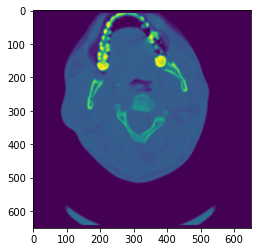

In [25]:
pyplot.imshow(data)
pyplot.show()